# Preprocessing

In [1]:
# Libraries
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd
import io
from PIL import Image
from array import *
import tensorflow as tf

import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical

from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
import os
general_path = "C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data" #The folder that contain data
n_fft = 2048 #FFT window size
hop_length = 512 #default number audio of frames between STFT columns 

label = list(os.listdir(f'{general_path}/genres_original/'))  #get label's name from folder name

#construct label's corresponding index
index = list(range(len(label)))  
label_dict = dict(zip(label,index))


display(label_dict)

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [3]:
#The method takes the figure of a matplotib as input, and return a corresponding x * y * 3 dataset of the figure.
#x is the width of the figure, y is the height of the figure, the set of size 3 infer the RGB data of the figure.
# each block of 3 data contains the information of the RGB value of the pixel at (x,y)
def fig2cifar(fig):

    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    pix = img.load()
    width, height = img.size 
    data = np.empty(( height, width, 3),dtype = np.uint8)

    for x in range(0,width):
        for y in range(0,height):
            data[y][x] = np.asarray(pix[x,y][:-1])

    buf.close()
    
    return data

In [4]:
y = np.empty((210, 1), dtype = np.uint8)

In [5]:
#grab audios from folder

n = 210 #total number of audio
y=[]
#y = np.empty((n, 1), dtype = np.uint8)  #classification value for the training set
x = [] #initalize the array for dataset
mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
plt.ioff()  #disable interactive mode of matplotlib off to avoid exploding plots output during the transforming process

#for each folder:
for l in label:
    
    #y[label_dict[l] * 10 : ( label_dict[l] + 1 ) * 10] = label_dict[l]      #set the classificaition information
    
    files = list(os.listdir(f'{general_path}/genres_original/{l}'))           #grab the file list of the class folder
    for f in files[0:21]:
        a,sr = librosa.load(f'{general_path}/genres_original/{l}/{f}')        #load the audio
        a, _ = librosa.effects.trim(a)                                        #trim the audio file
        stft = np.abs(librosa.stft(a, n_fft = n_fft, hop_length = hop_length))  #preform the STFT(Short-time Fourier Transform) of the audio 
        
        db = librosa.amplitude_to_db(stft, ref = np.max)                      # convert the spectrogram to db0scaled spectrogram 
        
        plt.figure(figsize = (16,6))
        librosa.display.specshow(db, sr = sr, hop_length = hop_length, x_axis = 'off', y_axis = 'off');  #generate the plot
        fig = plt.gcf()
        
        data = fig2cifar(fig)                                                 #generate data via the plot
        gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
        filtered_image = cv2.filter2D(gray, -1, mat_x)
        y.append([label_dict[l]])
        x.append(filtered_image)
        plt.close()                                                           #close the plot instance before next iteration
        display(f'{general_path}/genres_original/{l}/{f} done')
        
        
x = np.asarray(x, dtype = np.uint8) 
y = np.asarray(y, dtype = np.uint8)
plt.ion()  #enable interactive mode of matplotlib



'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/blues/blues.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/classical/classical.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/country/country.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/disco/disco.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/hiphop/hiphop.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/jazz/jazz.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/metal/metal.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/pop/pop.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/reggae/reggae.00020.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00000.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00001.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00002.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00003.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00004.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00005.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00006.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00007.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00008.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00009.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00010.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00011.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00012.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00013.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00014.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00015.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00016.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00017.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00018.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00019.wav done'

'C:/Users/Muhammad Faique/Box/Deep Learning/Project/archive (3)/Data/genres_original/rock/rock.00020.wav done'

In [6]:
from matplotlib import image
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [7]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

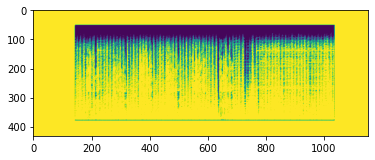

In [9]:
pyplot.imshow(x[2])
pyplot.show()

# CNN

In [10]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [13]:
#loading data
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(157, 432, 1152)
(53, 432, 1152)


In [14]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [15]:
#defining model
model=Sequential()
#First convolution layer
model.add(Conv2D(16, (5, 5), input_shape=(432, 1152, 1), padding='valid', activation='relu'))
#First pooling layer
model.add(MaxPool2D((2,2),strides = (2,2)))
#Second convolution layer
model.add(Conv2D(32, (5, 5), padding='valid', activation='relu'))
#Second pooling layer
model.add(MaxPool2D((2,2),strides = (2,2)))
#Fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.L2(l2=1e-4),activity_regularizer=regularizers.L2(1e-5)))
#Output layer
model.add(Dense(10,activation='softmax'))
#Model Compilation
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Model Fitting After adding early stoping and validation dataset
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train,y_train,validation_split=0.30,epochs=20,callbacks=[callback])
#reference analyticsvidhya.com

Epoch 1/20
4/4 [==============================] - 38s 8s/step - loss: 33.3746 - accuracy: 0.1009 - val_loss: 5.2524 - val_accuracy: 0.1667
Epoch 2/20
4/4 [==============================] - 32s 8s/step - loss: 5.6921 - accuracy: 0.0550 - val_loss: 2.3862 - val_accuracy: 0.1250
Epoch 3/20
4/4 [==============================] - 30s 7s/step - loss: 2.3574 - accuracy: 0.2202 - val_loss: 2.3186 - val_accuracy: 0.1875
Epoch 4/20
4/4 [==============================] - 34s 8s/step - loss: 2.1271 - accuracy: 0.3761 - val_loss: 2.3595 - val_accuracy: 0.0833
Epoch 5/20
4/4 [==============================] - 34s 8s/step - loss: 1.6763 - accuracy: 0.5688 - val_loss: 2.1251 - val_accuracy: 0.2708
Epoch 6/20
4/4 [==============================] - 40s 10s/step - loss: 1.1922 - accuracy: 0.7156 - val_loss: 1.7557 - val_accuracy: 0.3958
Epoch 7/20
4/4 [==============================] - 37s 9s/step - loss: 0.7109 - accuracy: 0.8440 - val_loss: 4.2720 - val_accuracy: 0.1875
Epoch 8/20
4/4 [================

In [16]:
#Model Evaluation
model.evaluate(X_test,y_test)

2/2 [==============================] - 3s 1s/step - loss: 1.7393 - accuracy: 0.4340


[1.7393426895141602, 0.43396225571632385]